In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
sns.set(style='white', context='notebook', palette='deep')

In [29]:
m_cols = ['MovieID','Title','Genres']
genres = ['Adventure','Animation',"Children's",'Comedy',\
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',\
          'Romance','Sci-Fi','Thriller','War','Western']
movies = pd.read_csv('data/movies.dat',sep='::',names=m_cols, encoding='latin-1')
movies['Genres'] = movies['Genres'].apply(lambda g: g.split('|'))
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
movies = movies.join(pd.DataFrame(mlb.fit_transform(movies.pop('Genres')),
                          columns=mlb.classes_,
                          index=movies.index))
movies.head()
#sep="\s+|;|:",


,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
r_cols = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_csv('data/ratings.dat',sep='::',names=r_cols, encoding='latin-1')
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
u_cols=['UserID','Gender','Age','Occupation','Zip-code']
users = pd.read_csv('data/users.dat',sep='::',names=u_cols, encoding='latin-1')
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [14]:
users.shape

(6040, 5)

In [31]:
movies.shape

(3883, 20)

In [30]:
ratings.shape

(1000209, 4)

In [32]:
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [33]:
movie_raings = pd.merge(movies, ratings)
movie_raings.head()

,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,UserID,Rating,Timestamp
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,5,978824268
1,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,6,4,978237008
2,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,8,4,978233496
3,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,9,5,978225952
4,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,10,5,978226474


In [34]:
dataset = pd.merge(movie_raings, users)
dataset.head()

,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Thriller,War,Western,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),0,0,1,1,0,0,0,0,...,0,0,0,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),0,0,0,0,0,0,0,1,...,0,0,0,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,0,0,0,0,0,0,...,0,0,0,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),0,0,0,0,0,0,0,1,...,0,1,0,1,5,978824195,F,1,10,48067


In [35]:
dataset.drop(['Timestamp'],axis=1,inplace=True)

In [37]:
ratings_matrix = ratings.pivot_table(index=['MovieID'],columns=['UserID'],values='Rating').reset_index(drop=True)
ratings_matrix

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
ratings_matrix.fillna(0,inplace=True)

In [39]:
ratings_matrix.head()

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,5.0,5.0,...,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) 
ratings_matrix = pd.DataFrame( movie_similarity )

In [42]:
ratings_matrix

,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
0,0.000000,0.390349,0.267943,0.178789,0.256569,0.347373,0.301490,0.125709,0.106620,0.377459,...,0.099502,0.020966,0.084105,0.081826,0.045949,0.309676,0.186633,0.093479,0.042829,0.182691
1,0.390349,0.000000,0.240946,0.155457,0.249970,0.244827,0.262772,0.196521,0.158469,0.386200,...,0.061819,0.015209,0.075310,0.095573,0.074271,0.213650,0.140781,0.087013,0.026063,0.122185
2,0.267943,0.240946,0.000000,0.192788,0.308290,0.187020,0.292230,0.092122,0.128378,0.245601,...,0.038492,0.065507,0.049512,0.087377,0.050985,0.190575,0.104837,0.062258,0.010073,0.097786
3,0.178789,0.155457,0.192788,0.000000,0.271990,0.125170,0.220024,0.049554,0.060334,0.133707,...,0.055486,0.053300,0.002227,0.025278,0.025204,0.118902,0.096318,0.022588,0.024769,0.095154
4,0.256569,0.249970,0.308290,0.271990,0.000000,0.148114,0.305107,0.095512,0.138392,0.237681,...,0.026632,0.083898,0.046399,0.047542,0.016156,0.174554,0.092403,0.051633,0.010750,0.112835
5,0.347373,0.244827,0.187020,0.125170,0.148114,0.000000,0.184966,0.055532,0.172145,0.418485,...,0.089106,0.025354,0.017274,0.112076,0.087213,0.236447,0.201419,0.115331,0.029136,0.222836
6,0.301490,0.262772,0.292230,0.220024,0.305107,0.184966,0.000000,0.049023,0.083145,0.248029,...,0.066875,0.051497,0.037842,0.065268,0.051835,0.191689,0.117660,0.059262,0.036102,0.138879
7,0.125709,0.196521,0.092122,0.049554,0.095512,0.055532,0.049023,0.000000,0.045263,0.107235,...,0.028519,0.072446,0.064868,0.059819,0.066350,0.090387,0.080523,0.084976,0.072141,0.045523
8,0.106620,0.158469,0.128378,0.060334,0.138392,0.172145,0.083145,0.045263,0.000000,0.216823,...,0.046188,0.014033,0.020523,0.103986,0.049767,0.092347,0.099554,0.004956,0.000000,0.057881
9,0.377459,0.386200,0.245601,0.133707,0.237681,0.418485,0.248029,0.107235,0.216823,0.000000,...,0.072576,0.049577,0.041950,0.121969,0.090955,0.237227,0.136374,0.097170,0.018359,0.161396


In [45]:
movie = movies['Title'][0]

In [54]:
#try:
#user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
user_inp = movie
inp=movies[movies['Title']==user_inp].index.tolist()
inp=inp[0]
print('inp: ', inp)
movies['similarity'] = ratings_matrix.iloc[inp]

    
# except:
#     print("Sorry, the movie is not in the database!")
    
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

inp:  0
Recommended movies based on your choice of  Toy Story (1995) : 
       MovieID                                              Title  Action  \
1173     1190                     Tie Me Up! Tie Me Down! (1990)       0   
574       578                        Hour of the Pig, The (1993)       0   
2162     2231                                    Rounders (1998)       0   
1178     1196  Star Wars: Episode V - The Empire Strikes Back...       1   
33         34                                        Babe (1995)       0   
1106     1122                            Plutonium Circus (1995)       0   
1449     1477                                  Love Jones (1997)       0   
346       350                                 Client, The (1994)       0   
2374     2443                            Playing by Heart (1998)       0   

      Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  \
1173          0          0           0       0      0            0      1   
574         

# data visualization and analysis

In [55]:
dataset.columns

Index(['MovieID', 'Title', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'UserID', 'Rating', 'Gender', 'Age', 'Occupation',
       'Zip-code'],
      dtype='object')

In [56]:
dataset.head()

,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Sci-Fi,Thriller,War,Western,UserID,Rating,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,1,5,F,1,10,48067
1,48,Pocahontas (1995),0,0,1,1,0,0,0,0,...,0,0,0,0,1,5,F,1,10,48067
2,150,Apollo 13 (1995),0,0,0,0,0,0,0,1,...,0,0,0,0,1,5,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),1,1,0,0,0,0,0,0,...,1,0,0,0,1,4,F,1,10,48067
4,527,Schindler's List (1993),0,0,0,0,0,0,0,1,...,0,0,1,0,1,5,F,1,10,48067


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 26 columns):
MovieID        1000209 non-null int64
Title          1000209 non-null object
Action         1000209 non-null int64
Adventure      1000209 non-null int64
Animation      1000209 non-null int64
Children's     1000209 non-null int64
Comedy         1000209 non-null int64
Crime          1000209 non-null int64
Documentary    1000209 non-null int64
Drama          1000209 non-null int64
Fantasy        1000209 non-null int64
Film-Noir      1000209 non-null int64
Horror         1000209 non-null int64
Musical        1000209 non-null int64
Mystery        1000209 non-null int64
Romance        1000209 non-null int64
Sci-Fi         1000209 non-null int64
Thriller       1000209 non-null int64
War            1000209 non-null int64
Western        1000209 non-null int64
UserID         1000209 non-null int64
Rating         1000209 non-null int64
Gender         1000209 non-null object
Age        

In [58]:
dataset['Gender'].unique()

array(['F', 'M'], dtype=object)

In [59]:
dataset['Gender'].value_counts()

M    753769
F    246440
Name: Gender, dtype: int64

In [60]:
dataset['Gender'] = dataset['Gender'].map({'F':0,'M':1})

In [61]:
dataset.drop(['Zip-code'],axis=1,inplace=True)

In [86]:
movie_raings_mean = pd.DataFrame(dataset.groupby(['Title'])['Rating'].mean())

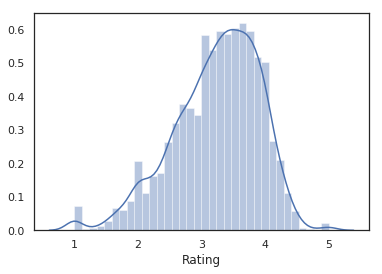

In [88]:
sns.distplot(movie_raings_mean['Rating'])